<a href="https://colab.research.google.com/github/murigugitonga/math_4_ai/blob/dev/03_calculus/05_chain_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculus — Chain Rule

**Objective:** Understand the chain rule for composed functions and connect it
directly to gradient propagation in machine learning models.

---

> Many ML models are **composed functions**:
> - Example: y_pred = f(g(h(x)))
> - Chain rule allows us to compute derivatives efficiently
> - This is exactly what backpropagation does


## 1. Intuition

- Chain rule helps differentiate **nested functions**
- If y depends on u, and u depends on x:

\[
y = f(u), \quad u = g(x)
\]

Then the derivative of y w.r.t x is:

\[
\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}
\]

- In ML: each layer = function → chain rule tells how to propagate gradients


## 2. Mathematical Definition

For nested functions:

\[
y = f(g(h(x)))
\]

Derivative w.r.t x:

\[
\frac{dy}{dx} = f'(g(h(x))) \cdot g'(h(x)) \cdot h'(x)
\]

- Multiply derivatives **from outermost to innermost**
- Each term = rate of change at that layer


In [2]:
# chain rule sample code

import numpy as np

# functions
def h(x):
  return x**2

def g(u):
  return np.sin(u)

def f(v):
  return np.exp(v)

# forward pass
x = 1.0
v = h(x)
u = g(v)
y = f(u)

# manual derivatives
dh_dx = 2*x
dg_dv = np.cos(v)
df_du = np.exp(u)


dy_dx = df_du * dg_dv * dh_dx

dy_dx


np.float64(2.506761534986894)

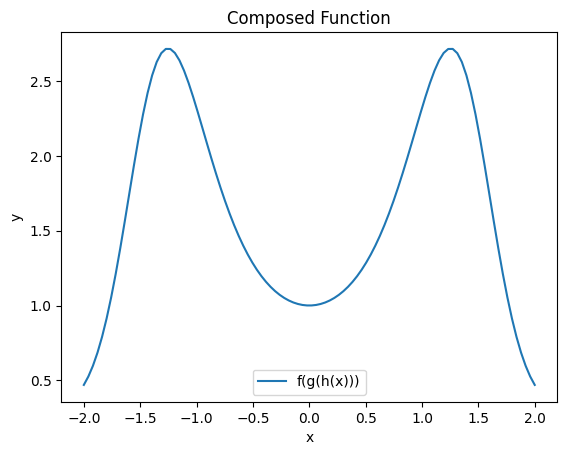

In [3]:
# visualizing the chain rule
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 100)

h_x = h(x)
g_hx = g(h_x)
f_ghx = f(g_hx)

plt.plot(x, f_ghx, label='f(g(h(x)))')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Composed Function')
plt.legend()
plt.show()

## 3. Connection to ML

- Each layer in a neural network is a function
- Output = composition of layers
- Backprop = repeated application of chain rule
- Gradient of loss w.r.t parameters:

\[
\frac{\partial L}{\partial w} = \frac{\partial L}{\partial a_L} \cdot \frac{\partial a_L}{\partial a_{L-1}} \cdot ... \cdot \frac{\partial a_1}{\partial w}
\]

- Chain rule allows efficient computation


In [4]:
# a simple two layer network

# layer 1
def layerOne(x, w1):
  return w1 * x

# layer 2
def layerTwo(h, w2):
  return w2 * h

# computer loss
def loss(x, w1, w2, y_true = 2.0):
  y_pred = layerTwo(layerOne(x, w1), w2)
  return (y_true - y_pred)**2

# compute gradient manually using chain rule
x, w1, w2 = 1.0, 0.5, 0.5

# forward pass
h =layerOne(x,  w1)
y_pred = layerTwo(h, w2)
l = (2 -y_pred) ** 2

# gradients
dL_dy = -2*(2 - y_pred)
dy_dw2 = h
dy_dh = w2
dy_dw1 = w2 * x

dL_dw2 = dL_dy * dy_dw2
dL_dw1 = dL_dy * dy_dw1
dL_dw1, dL_dw2

(-1.75, -1.75)

## 5. Key Takeaways

- Chain rule = derivative of nested/composed functions
- Gradients of complex functions = product of derivatives
- Backpropagation = repeated chain rule application
- Mastering chain rule → understanding deep learning
